In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression,Lasso,Ridge
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, mean_squared_error,r2_score
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from scipy.stats import chi2_contingency, boxcox
import scipy.stats as stats
import sklearn.preprocessing as preprocessing
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from statsmodels.tsa.stattools import adfuller as adf
from statsmodels.tsa.seasonal import seasonal_decompose

In [66]:
train = pd.read_csv('dataset/Train_Data (2).csv')

In [67]:
test = pd.read_csv('dataset/Test_Data (1).csv')

In [69]:
train.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [77]:
train.set_index(pd.DatetimeIndex(train['date']), inplace = True)

In [78]:
train

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
date,,,,,,,,,
2020-01-08,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
2020-01-08,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2020-01-08,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
2020-01-08,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
2020-01-08,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71
...,...,...,...,...,...,...,...,...,...
2021-02-28,28-02-2021,campaign 1,adgroup 3,ad 55,19,6,0.07,0,0.00
2021-02-28,28-02-2021,campaign 1,adgroup 4,ad 55,1,0,0.00,0,0.00
2021-02-28,28-02-2021,campaign 1,adgroup 3,ad 56,16,8,0.12,1,93.20


In [90]:
train[train.index == train.index + timedelta(0)]

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
date,,,,,,,,,
2020-01-08,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
2020-01-08,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2020-01-08,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
2020-01-08,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
2020-01-08,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71
...,...,...,...,...,...,...,...,...,...
2021-02-28,28-02-2021,campaign 1,adgroup 3,ad 55,19,6,0.07,0,0.00
2021-02-28,28-02-2021,campaign 1,adgroup 4,ad 55,1,0,0.00,0,0.00
2021-02-28,28-02-2021,campaign 1,adgroup 3,ad 56,16,8,0.12,1,93.20


In [91]:
train.iloc[0,:]

date           01-08-2020
campaign       campaign 1
adgroup         adgroup 1
ad                   ad 1
impressions            24
clicks                  6
cost                 0.08
conversions             0
revenue               0.0
Name: 2020-01-08 00:00:00, dtype: object

In [94]:
a = train.index

In [95]:
a

DatetimeIndex(['2020-01-08', '2020-01-08', '2020-01-08', '2020-01-08',
               '2020-01-08', '2020-01-08', '2020-01-08', '2020-01-08',
               '2020-01-08', '2020-01-08',
               ...
               '2021-02-28', '2021-02-28', '2021-02-28', '2021-02-28',
               '2021-02-28', '2021-02-28', '2021-02-28', '2021-02-28',
               '2021-02-28', '2021-02-28'],
              dtype='datetime64[ns]', name='date', length=4571, freq=None)

In [98]:
for i,j in enumerate(a):
    if (i == len(a)-2):
        break
    if ((a[i+1] != a[i] + timedelta(1)) & (a[i+1] != a[i+1])):
        print(a[i])

<AxesSubplot:xlabel='date'>

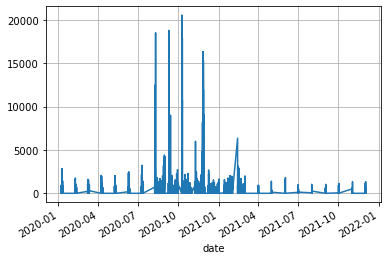

In [99]:
train['revenue'].plot(grid=True)

In [109]:
train[(train.index.year == 2021) & (train.index.month == 6)]

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
date,,,,,,,,,
2021-06-01,06-01-2021,campaign 1,adgroup 4,ad 1,8,3,0.03,0,0.00
2021-06-01,06-01-2021,campaign 1,adgroup 3,ad 1,16,10,0.13,1,161.00
2021-06-01,06-01-2021,campaign 1,adgroup 2,ad 1,2,2,0.04,0,0.00
2021-06-01,06-01-2021,campaign 1,adgroup 1,ad 1,21,11,0.11,0,0.00
2021-06-01,06-01-2021,campaign 1,adgroup 1,ad 2,658,274,3.33,10,1570.32
2021-06-01,06-01-2021,campaign 1,adgroup 2,ad 2,19,10,0.17,1,51.50
2021-06-01,06-01-2021,campaign 1,adgroup 4,ad 3,3,2,0.02,0,0.00
2021-06-01,06-01-2021,campaign 1,adgroup 2,ad 3,1,0,0.00,0,0.00
2021-06-01,06-01-2021,campaign 1,adgroup 3,ad 3,202,104,1.44,0,0.00


In [111]:
train['new date'] = train['date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

In [112]:
train['new date']

date
2020-01-08   2020-08-01
2020-01-08   2020-08-01
2020-01-08   2020-08-01
2020-01-08   2020-08-01
2020-01-08   2020-08-01
                ...    
2021-02-28   2021-02-28
2021-02-28   2021-02-28
2021-02-28   2021-02-28
2021-02-28   2021-02-28
2021-02-28   2021-02-28
Name: new date, Length: 4571, dtype: datetime64[ns]

In [113]:
train.set_index(train['new date'], inplace=True)

<AxesSubplot:xlabel='new date'>

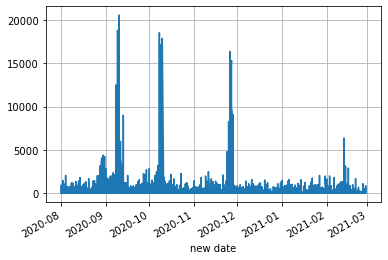

In [114]:
train['revenue'].plot(grid=True)